# 준비사항 > 시드를 고정한다

In [54]:
seed = 1234

# Clustering

In [2]:
import numpy as np
import pandas as pd

In [3]:
cd data

c:\Users\qotnd\Desktop\ADP\머신러닝\data


In [4]:
df = pd.read_csv("marketing_campaign.csv", sep = "\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


data는 29개의 컬럼과 2240개의 행을 가진다.

## 데이터 소개

- 프로젝트 목표 : 고객 데이터를 분석하고, PCA와 K-means clustering 방법론을 이용하여 고객을 세분화한 뒤 각 세그먼트의 고객 프로파일링을 수행한다.

##### 변수 요약
https://www.kaggle.com/code/seungbumlim/how-to-select-the-optimal-number-for-pca-kmeans

## 데이터 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

범주형 변수를 확인해보면 Education, Marital_Status, Dt_Customer이다.
- Education : 교육 수준
- Marital_Status : 혼인상태
- Dt_Customer : 최초 고객등록일

In [7]:
cat_var = ["Education", "Marital_Status", "Dt_Customer"]

In [8]:
for var in cat_var:
    print(f"{var}의 고유 값 : {df[var].unique()}")

Education의 고유 값 : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status의 고유 값 : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Dt_Customer의 고유 값 : ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06-12-2013' '21-05-2013' '11-05-2014'
 '19-03-2014' '27-09-20

Education, Marital_Status 변수의 경우 라벨 인코딩을 진행해주며, Dt_Customer의 경우 날짜 타입으로 변경해준다.

##### Dt_Customer의 타입 변환

In [9]:
df["Dt_Customer"]

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [10]:
df["Dt_Customer2"]=df["Dt_Customer"].map(lambda x: pd.to_datetime(str(x), format = '%d-%m-%Y'))

In [11]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer                    object
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

##### 결측치 확인

In [12]:
df.isnull().sum()*100/len(df)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
Dt_Customer2           0.000000
dtype: float64

Income 변수의 경우 5퍼센트 미만의 결측값을 가지고 있으므로, 평균값으로 대체해준다.

In [13]:
df["Income"] = df["Income"].fillna(df["Income"].mean())

In [14]:
### 결측치를 다시 확인한다.
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Dt_Customer2           0
dtype: int64

결측치가 모두 제거된 것을 확인할 수 있다.

## EDA

##### 파생 변수의 생성

In [15]:
### 구매금액 변수의 생성
df["Amount"] = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis = 1)

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer2,Amount
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,2012-09-04,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2014-03-08,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,2013-08-21,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,2014-02-10,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,2014-01-19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,2013-06-13,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,2014-06-10,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,2014-01-25,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,2014-01-24,843


In [17]:
## 나이 변수를 만든다.
df["Age"] = 2023-df["Year_Birth"]+1

EDA의 경우 아래 링크를 참고하였습니다.
- https://www.kaggle.com/code/seungbumlim/how-to-select-the-optimal-number-for-pca-kmeans

고객 관련 변수(Education, Age, Income)에 따른 매출액과의 관계를 시각화 해보자.

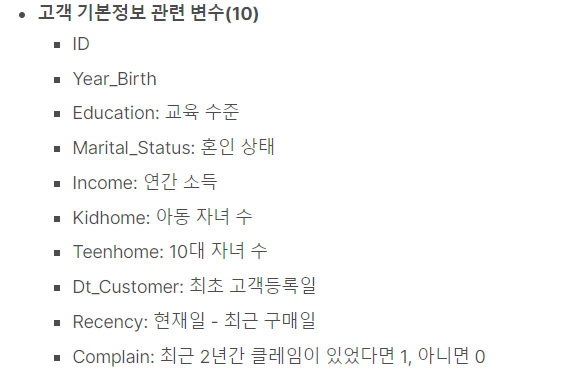

<Axes: xlabel='Education'>

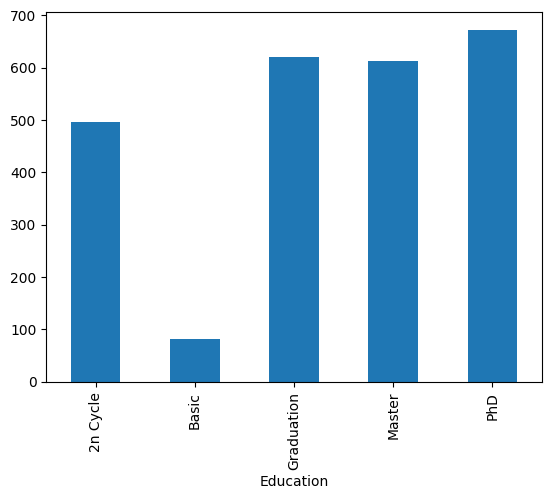

In [18]:
## 교육 수준에 따른 매출액 분포
df.groupby(by = "Education")["Amount"].mean().plot.bar()

Basic인 경우의 매출액 평균이 가장 낮은 것을 확인할 수 있다. Education 변수는 지출액을 구분할 수 있는 중요한 변수임을 확인할 수 있습니다.

In [19]:
import matplotlib.pyplot as plt

In [20]:
df.Year_Birth


0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

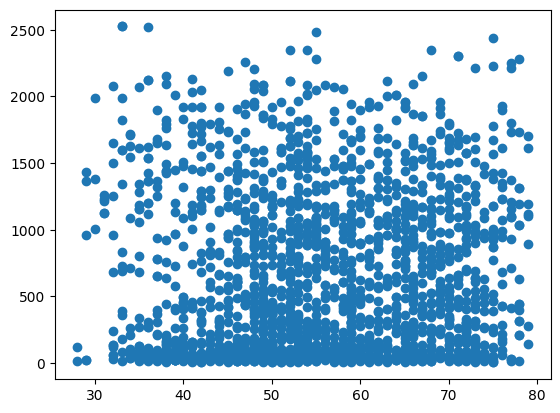

In [21]:
plt.scatter(x = df[df.Age<80].Age, y = df[df.Age<80].Amount)

나이에 따른 매출액에는 큰 패턴이 보이지 않는다.

(array([ 28.,  92., 139., 165., 271., 305., 286., 210., 225., 200., 180.,
         96.,  38.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   1.]),
 array([ 28.  ,  32.12,  36.24,  40.36,  44.48,  48.6 ,  52.72,  56.84,
         60.96,  65.08,  69.2 ,  73.32,  77.44,  81.56,  85.68,  89.8 ,
         93.92,  98.04, 102.16, 106.28, 110.4 , 114.52, 118.64, 122.76,
        126.88, 131.  ]),
 <BarContainer object of 25 artists>)

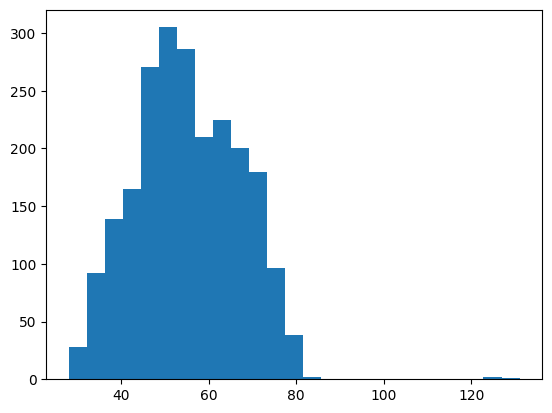

In [22]:
## Age 변수를 확인하기 위해 히스토그램을 확인한다.
plt.hist(df.Age, bins = 25)

히스토그램을 확인한 결과 50대의 비중이 가장 많은 것을 확인할 수 있으며 100세 이상의 나이를 갖는 고객도 확인할 수 있었다.

Text(0, 0.5, 'Amount')

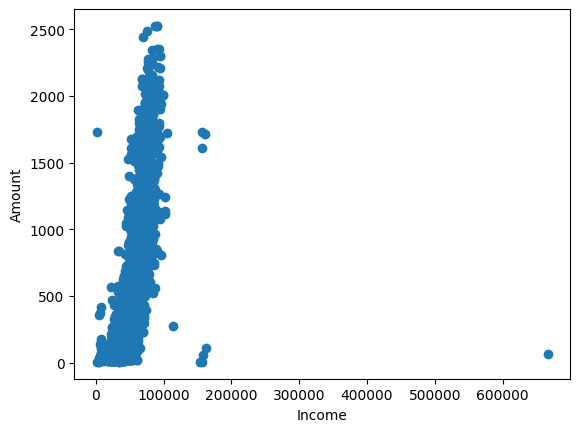

In [23]:
## Income과 매출액의 관계를 확인한다.
plt.scatter(x = df.Income, y = df.Amount)
plt.xlabel("Income")
plt.ylabel("Amount")

Income의 경우 600000이상의 값을 갖는 아싱치가 존재하는 것으로 확인된다. 더욱 정확한 두 변수의 관계를 확인하기 위해 해당 이상치를 제거하고 두 산점도를 다시 확인한다.

Text(0, 0.5, 'Amount')

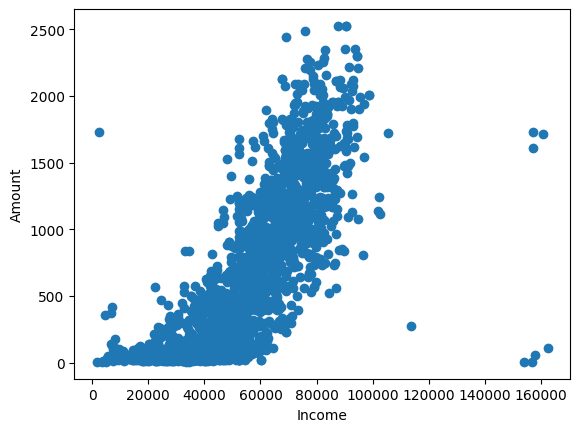

In [24]:
plt.scatter(x = df[df.Income<600000].Income, y= df[df.Income<600000].Amount)
plt.xlabel("Income")
plt.ylabel("Amount")

Amount변수와 Income변수는 양의 상관관계를 갖는 것을 확인할 수 있다. 즉, 수입이 많을수록 구매금액이 증가한다.

In [25]:
int_var = []
for i in df.columns:
    if df[i].dtypes =="int64":
        int_var.append(i)

<Axes: >

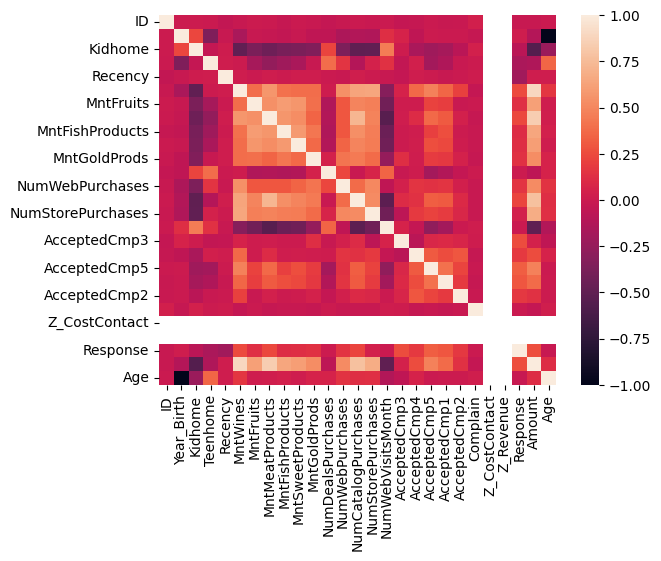

In [26]:
### 수치형 변수에 대해서만 상관관계를 확인해본다.
import seaborn as sns
sns.heatmap(df[int_var].corr())

##### 다중 공선성
- 다중 공선성이란 독립변수의 일부가 다른 독립변수의 조합으로 표현될 수 있는 경우. 독립 변수들이 서로 독립이 아니라 **상호상관관계가 강한 경우** 발생한다.
- 다중공선성을 해결하기 위해 다음과 같은 방법을 적용할 수 있다.
    - 상관관계가 높은 변수를 제거한다
    - PCA를 통해 새로운 변수를 만든다.(새로운 변수가 만들어질 때 직교하므로 변수들 사이의 상관관계가 0이 된다.)

In [27]:
df[int_var].corr()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Amount,Age
ID,1.000000,0.000028,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,...,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968,-0.018054,-0.000028
Year_Birth,0.000028,1.000000,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325,-0.111306,-1.000000
Kidhome,0.002406,0.230176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008,-0.556669,-0.230176
Teenhome,-0.002580,-0.352111,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446,-0.138384,0.352111
Recency,-0.046524,-0.019871,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437,0.020433,0.019871
MntWines,-0.022878,-0.157773,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254,0.891839,0.157773
MntFruits,0.004600,-0.017917,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289,0.614229,0.017917
MntMeatProducts,-0.004437,-0.030872,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335,0.842965,0.030872
MntFishProducts,-0.024475,-0.041625,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331,0.642818,0.041625
MntSweetProducts,-0.007642,-0.018133,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,0.028641,0.259590,0.241818,0.009985,-0.022485,NaN,NaN,0.117372,0.603016,0.018133


In [28]:
df.Z_CostContact.unique()

array([3], dtype=int64)

In [29]:
df.Z_Revenue.unique()

array([11], dtype=int64)

- Z_CostContact, Z_Revenue 변수의 경우 하나의 값만 가져 의미가 없으므로 제거합니다.
- Year_Birth 변수의 경우 Age를 대신 사용하므로 제거합니다.
- ID 는 불필요합니다.
- Dt_Customer, Dt_Customer2 모두 삭제합니다.

In [30]:
### 삭제할 변수들
drop_var = ["ID", "Dt_Customer","Year_Birth", "Z_CostContact","Z_Revenue"]

In [31]:
df_drop = df.drop(columns = drop_var)

## 전처리

##### 전처리에선 세가지를 진행한다.
- 범주형 변수 > 라벨 인코딩
- 수치형 변수 > 스케일링
- 주성분 분석

##### 라벨 인코딩

In [32]:
### 범주형 변수 확인
df_drop.dtypes

Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                        int64
Dt_Customer2           datetime64[ns]
Amount                          int64
Age         

In [33]:
cat_var = ["Education", "Marital_Status"]

In [39]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ----- ---------------------------------- 1.2/8.3 MB 26.1 MB/s eta 0:00:01
     ------------------ --------------------- 3.8/8.3 MB 40.4 MB/s eta 0:00:01
     ------------------------------- -------- 6.5/8.3 MB 46.0 MB/s eta 0:00:01
     ---------------------------------------  8.3/8.3 MB 48.2 MB/s eta 0:00:01
     ---------------------------------------- 8.3/8.3 MB 37.9 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\qotnd\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_drop["Education"])
df_drop['Education'] = le.transform(df_drop['Education'])

In [41]:
le = LabelEncoder()
le.fit(df_drop["Marital_Status"])
df_drop["Marital_Status"] = le.transform(df_drop["Marital_Status"])

In [42]:
### 범주형변수가 인코딩 된 것을 확인할 수 있다.
df_drop[["Education", "Marital_Status"]]

,Education,Marital_Status
0,2,4
1,2,4
2,2,5
3,2,5
4,4,3
...,...,...
2235,2,3
2236,4,5
2237,2,2
2238,3,5


In [43]:
df_drop = df_drop.drop(columns="Dt_Customer2")

##### 수치형 변수 스케일링(범주형 변수는 굳이 넣진 않는다.)

In [44]:
df_drop.dtypes

Education                int32
Marital_Status           int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Amount                   int64
Age                      int64
dtype: object

In [45]:
## min-max scaler
from sklearn.preprocessing import MinMaxScaler

nmscaler = MinMaxScaler()

nmscaler.fit(df_drop)
df_drop_sc = nmscaler.transform(df_drop)

수치형 변수의 스케일을 모두 완료하였다.

##### 차원축소

##### pca n_components 선택 방법
- Elbow method : 주성분이 늘어감에 따라 고유값이 유의미하게 감소하는 elbow 포인트에 해당하는 주성분 수를 선택 -> 사용자가 주관적으로 선택한다는 단점이 있으므로, 아래 방법과 같이 사용함.
- 분산 비율 선택법 : 전체 데이터에서 최소 70% 이상의 설명력을 가지는 주성분 갯수를 선택하는 방법

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
pca_fit = pca.fit(df_drop_sc)

In [47]:
print("분산 설명력 : ", pca_fit.explained_variance_ratio_)
print("분산 설명력 : ", pca_fit.explained_variance_ratio_[:7].sum())

분산 설명력 :  [2.59220621e-01 1.27862451e-01 9.07465021e-02 7.68496071e-02
 6.60755089e-02 6.03487970e-02 4.79974143e-02 3.95717631e-02
 3.66796290e-02 3.35703340e-02 2.46171838e-02 2.07887379e-02
 1.82144219e-02 1.46355460e-02 1.32417352e-02 1.08760738e-02
 1.04694310e-02 1.00984889e-02 9.22962055e-03 8.80330392e-03
 7.94893881e-03 4.64397298e-03 4.19957191e-03 2.74752245e-03
 5.62822908e-04 5.11222534e-32]
분산 설명력 :  0.7291009018233955


7개의 변수로 데이터를 약73퍼센트 설명할 수 있다. 따라서 n_components = 7로 지정한다.

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
pca_fit = pca.fit_transform(df_drop_sc)

In [49]:
pca_fit

array([[ 0.82932928,  0.34479659, -0.32333458, ...,  0.28350907,
         0.04269402, -0.6478996 ],
       [-0.58880566,  0.07153167,  0.06924928, ..., -0.13975845,
         0.09959665,  0.03400392],
       [ 0.26530002, -0.27529196, -0.23735998, ..., -0.11448523,
        -0.14516818,  0.01859089],
       ...,
       [ 0.56711841, -0.42305172,  0.16667747, ..., -0.3359184 ,
         0.05426519, -0.02632536],
       [ 0.23093831, -0.28836527,  0.25197573, ..., -0.09817943,
        -0.04569967,  0.07592295],
       [-0.16556733,  0.78357356,  0.46781012, ...,  0.20925858,
        -0.05511799, -0.48178208]])

In [50]:
pca_fit.shape

(2240, 7)

In [51]:
df_drop.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Amount', 'Age'],
      dtype='object')

## Clustering

##### 할 일
- K-means Clustering : 최적의 K값 결정
    - Elbow method
    - Silouette method
- 클러스터링 수행
    - K-Means
    - DBSCAN

### 최적의 K값 결정

##### Elbow method : K 값의 변화에 따른 Sum Squared Error의 추이 확인
- 클러스터 내의 거리는 잘 반영하지만, 클러스터 간의 거리는 잘 반영하지 않는다.

In [53]:
pca_fit

array([[ 0.82932928,  0.34479659, -0.32333458, ...,  0.28350907,
         0.04269402, -0.6478996 ],
       [-0.58880566,  0.07153167,  0.06924928, ..., -0.13975845,
         0.09959665,  0.03400392],
       [ 0.26530002, -0.27529196, -0.23735998, ..., -0.11448523,
        -0.14516818,  0.01859089],
       ...,
       [ 0.56711841, -0.42305172,  0.16667747, ..., -0.3359184 ,
         0.05426519, -0.02632536],
       [ 0.23093831, -0.28836527,  0.25197573, ..., -0.09817943,
        -0.04569967,  0.07592295],
       [-0.16556733,  0.78357356,  0.46781012, ...,  0.20925858,
        -0.05511799, -0.48178208]])

In [57]:
from sklearn.cluster import KMeans

C:\Users\qotnd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\qotnd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\qotnd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

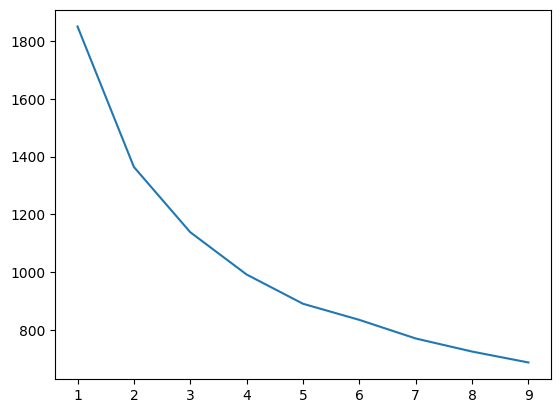

In [62]:
### elbow method
elbow = []
for k in range(1, 10):
    km = KMeans(n_clusters = k)
    km = km.fit(pca_fit)
    elbow.append(km.inertia_)

plt.plot(range(1, 10), elbow)

In [63]:
elbow

[1850.8000170149421,
 1364.3347547324358,
 1138.4356866101105,
 991.9534027375132,
 890.6523932045466,
 834.8280218836369,
 770.4323279917362,
 725.145875879566,
 687.3193605835565]

급격히 값이 떨어지는 구간이 K=3이므로 군집의 크기를 3으로 설정한다.

### 군집화
##### K-Means

- K-Means : k평균 클러스터링은 입력 값으로 k를 취하고 객체 집합을 k개의 클러스터로 만드는 방법입니다. 즉, 클러스터 내 유사성은 높게, 클러스터 간 유사성은 낮게 해야 좋은 분류가 이루어집니다.
- 특징 : 거리 기반 분류이므로 유클리디안 거리를 측정하며, 중심점과의 거리를 최소화하는 작업을 반복하는 비지도학습 기법입니다.
- 장점 :
    - 분석 방법의 적용이 쉽다.
    - 데이터에 대한 사전 정보가 필요하지 않으며, 사전에 특정 변수에 대한 역할 정의가 필요하지 않다.
    - 또한, 관찰 데이터 간의 거리만이 분석에 필요한 입력 값이다.
- 단점
    - 관찰 데이터들 사이의 거리를 정의하는 것이 어렵고, 각 변수에 대한 가중치를 결정하는 것이 어렵다.
    - 초기 클러스터의 수를 결정하는 데에 어려움이 있는데, 초기 설정 클러수터 수가 적합하지 않으면 결과가 좋지 못하다.
    - 모든 데이터를 거리로만 판단하게 됨으로, 사전에 주어진 목적이 없어 결과 해석이 어렵다는 단점도 존재한다.

In [64]:
## k=3으로 클러스터링 수행
km = KMeans(n_clusters = 3, random_state = seed)

label = km.fit_predict(pca_fit)

C:\Users\qotnd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [76]:
cols = []
for i in range(1, 8):
    cols.append("PCA"+str(i))

In [78]:
pca_fit = pd.DataFrame(pca_fit, columns = cols)

In [79]:
pca_fit

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,0.829330,0.344797,-0.323345,-0.146888,0.283454,0.042701,-0.648251
1,-0.588805,0.071535,0.069241,-0.043584,-0.139799,0.099629,0.033518
2,0.265301,-0.275294,-0.237373,-0.324262,-0.114462,-0.145148,0.018087
3,-0.487788,0.158307,-0.245133,-0.070912,-0.210644,-0.204539,0.088694
4,-0.201067,-0.147787,0.008322,0.356874,0.347522,-0.400453,-0.120830
...,...,...,...,...,...,...,...
2235,0.297408,-0.357291,0.025139,-0.208009,0.048051,0.224638,-0.026044
2236,-0.250853,0.191435,0.417675,0.340422,-0.011627,-0.121734,0.260540
2237,0.567119,-0.423051,0.166667,0.583739,-0.335866,0.054301,-0.026648
2238,0.230939,-0.288363,0.251969,-0.536551,-0.098184,-0.045670,0.075603


In [80]:
### for evaluating model
pca_fit["labels"] = label

### for customers profiling
df["labels"] = label

##### DBSCAN

- DBSCAN : 일정 밀도 이상을 가진 데이터를 기준으로 군집을 형성하는 방법
- 언제 사용하면 좋을까? : K-평균 군집호와는 다르게 사전에 클러스터의 숫자를 알지 못할 때 사용하면 유용하다. 또한, 주어진 데이터에 **이상치**가 많이 포함되었을 때 사용하면 좋다.
- 장점
    - 군집 수를 미리 정할 필요가 없다.
    - 불특정한 분포, 기하학적 모양의 군집도 잘 찾아낸다.(비선형적 클러시터링 가능)
    - 노이즈에 강하다.(클러스터링 수행 동시에 아웃라이어 분류 가능)

- 단점
    - 데이터 입력 순서에 따라 군집화 결과가 달라질 수 있다.

In [121]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.045, min_samples = 10).fit(pca_fit)
db_labels = dbscan.labels_

In [122]:
pca_fit["db_labels"] = db_labels
df["db_labels"] = db_labels

In [123]:
df.db_labels.unique()

array([-1,  0,  1], dtype=int64)

## 시각화

In [124]:
### 3 차원으로(변수 3개) 군집 결과를 확인해본다.
x = pca_fit["PCA1"]
y = pca_fit["PCA2"]
z = pca_fit["PCA3"]

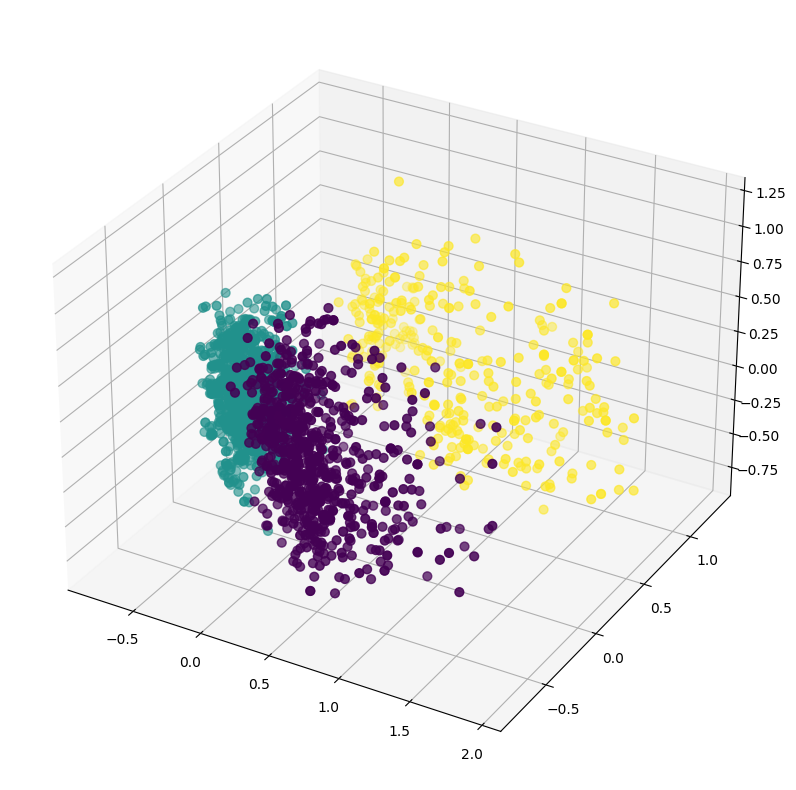

In [125]:
### k-means
fig = plt.figure(figsize = (12,10))

ax = plt.subplot(111, projection = "3d")
ax.scatter(x, y, z,  s = 40, c= pca_fit["labels"])

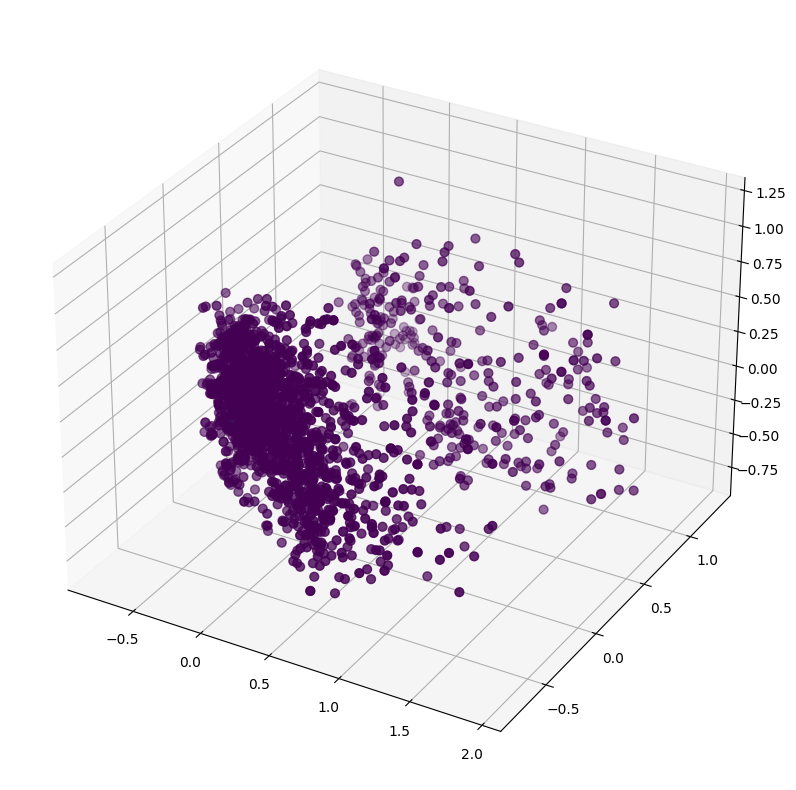

In [126]:
### dbscan
fig = plt.figure(figsize = (12,10))

ax = plt.subplot(111, projection = "3d")
ax.scatter(x, y, z,  s = 40, c= pca_fit["db_labels"])

<Axes: xlabel='PCA1', ylabel='PCA2'>

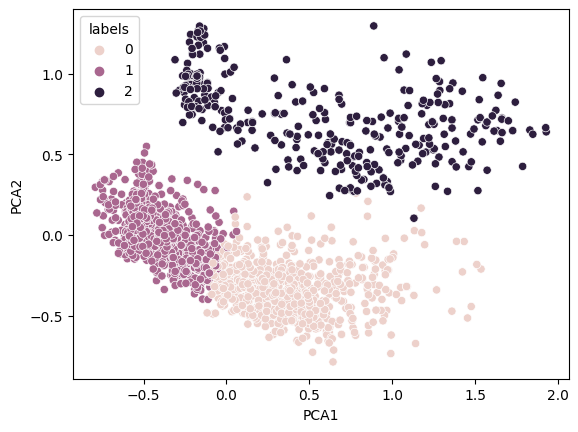

In [127]:
### k-means
sns.scatterplot(x = "PCA1", y = "PCA2", data= pca_fit, hue = pca_fit["labels"])

<Axes: xlabel='PCA1', ylabel='PCA2'>

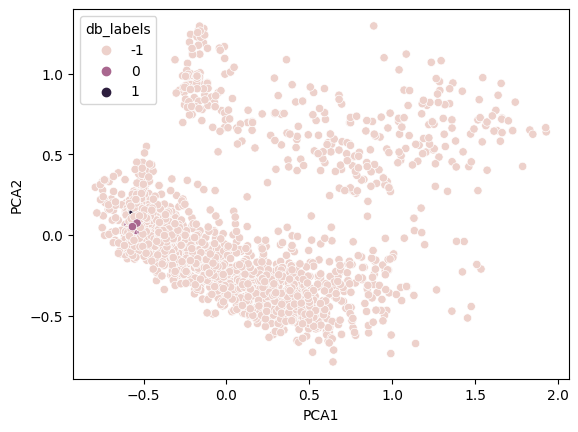

In [128]:
### dbscan
sns.scatterplot(x = "PCA1", y = "PCA2", data = pca_fit, hue = pca_fit["db_labels"])

## 고객 프로파일링

<Axes: xlabel='labels'>

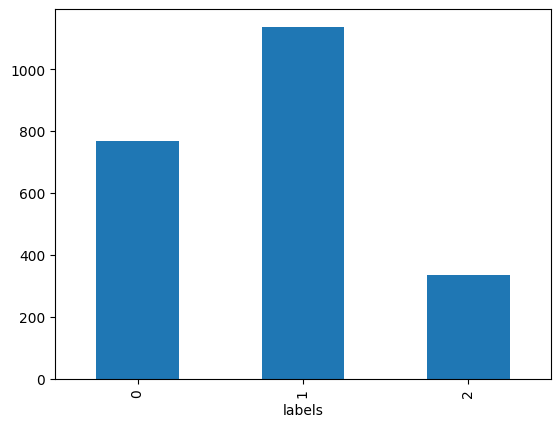

In [129]:
### 군집 별 수(k-means 기준)
df.groupby("labels").count()["ID"].plot.bar()

label 1이 가장 큰 비중을 차지한다.

<Axes: xlabel='labels'>

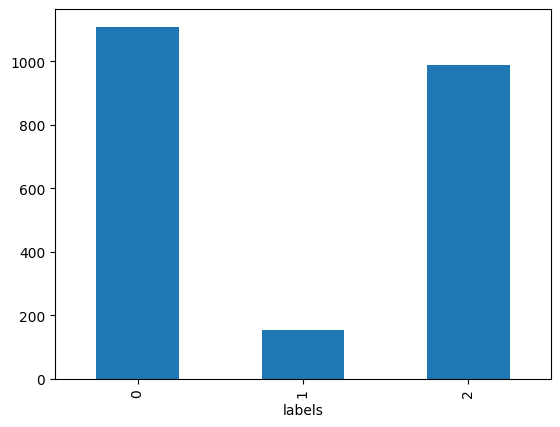

In [130]:
### 군집별 구매 금액
df.groupby("labels")["Amount"].mean().plot.bar()

평균 구매금액(인당 소비금액)이 가장 큰 집단은 0이다. labels1은 가장 수가 많지만 그만큼 구매를 하진 않는다.